In [27]:
from sklearn import datasets

from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

In [3]:
img_data = datasets.fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/vikrantmehla/scikit_learn_data


In [5]:
print(img_data)
img_data.keys()

{'data': array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.15289256, 0.16115703,
        0.1570248 ],
       [0.45454547, 0.47107437, 0.5123967 , ..., 0.15289256, 0.15289256,
        0.15289256],
       [0.3181818 , 0.40082645, 0.49173555, ..., 0.14049587, 0.14876033,
        0.15289256],
       ...,
       [0.5       , 0.53305787, 0.607438  , ..., 0.17768595, 0.14876033,
        0.19008264],
       [0.21487603, 0.21900827, 0.21900827, ..., 0.57438016, 0.59090906,
        0.60330576],
       [0.5165289 , 0.46280992, 0.28099173, ..., 0.35950413, 0.3553719 ,
        0.38429752]], dtype=float32), 'images': array([[[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083,
         0.3305785 , 0.30578512],
        [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083,
         0.338843  , 0.3140496 ],
        [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528,
         0.338843  , 0.29752067],
        ...,
        [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256,
         0.16528925, 0.17

dict_keys(['data', 'images', 'target', 'DESCR'])

In [12]:
## here X represnts the images in the form of 2D array
X = img_data.data
print(X.shape)


## Here Y represents the exact images in the dataset
Z = img_data.images
print(Z.shape)


## Here Y represents the target
Y = img_data.target
print(Y.shape)


(400, 4096)
(400, 64, 64)
(400,)


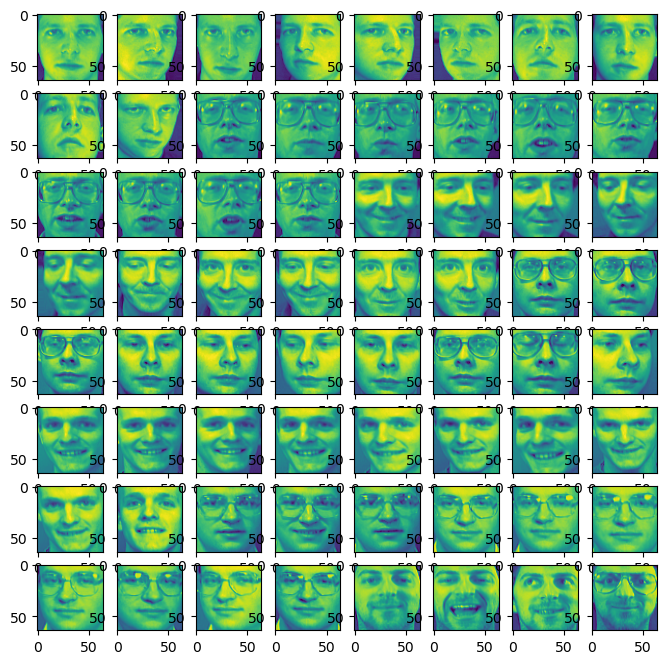

In [10]:
## Here we are plotting the 64 images in 8x8 matrix

fig = plt.figure(figsize=(8,8))      ##define the size of matrix
for i in range(64):                  
    ax = fig.add_subplot(8,8,i+1)     ## added a subplot with 8 rows, 8 columns and image position
    ax.imshow(Z[i])                  ## to print the image at ith position
    
plt.show()

## Feature Scaling & Data Splitting

In [29]:
sc = StandardScaler()
X_std = sc.fit_transform(X)


X_train, X_test, Y_train, Y_test = train_test_split(X_std, Y)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)



(300, 4096)
(300,)
(100, 4096)
(100,)


## SVM Classification without PCA

In [30]:
clf1 = SVC()
clf1.fit(X_train, Y_train)



SVC()

In [32]:
## Prediction on training data

Y_pred_train= clf1.predict(X_train)
print(Y_pred_train.shape)

print(confusion_matrix(Y_train, Y_pred_train))
print(classification_report(Y_train, Y_pred_train))


(300,)
[[7 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         9
        

In [33]:
## Prediction on testing data

Y_pred_test= clf1.predict(X_test)
print(Y_pred_test.shape)

print(confusion_matrix(Y_test, Y_pred_test))
print(classification_report(Y_test, Y_pred_test))

(100,)
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 4]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         2
           2       1.00      0.80      0.89         5
           3       1.00      0.60      0.75         5
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
        

/Users/vikrantmehla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikrantmehla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikrantmehla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

## PCA on Images

In [34]:
pca = PCA()
X_transform = pca.fit_transform(X_train)

In [35]:
pca.components_.shape

(300, 4096)

In [36]:
## Here we will find optimal number of features by keeping 95% of variance in data

total = sum(pca.explained_variance_)
k =0 
current_var = 0


while(current_var/total < 0.95):
    current_var = current_var + pca.explained_variance_[k]
    k = k+1

print("Optimal Value of features that keep 95% of information contained :",k)


Optimal Value of features that keep 95% of information contained : 108


In [42]:
pca1 = PCA(n_components=108)

X_train_pca = pca1.fit_transform(X_train)
X_test_pca = pca1.transform(X_test)

In [45]:
## Now instead of having 4096 features , we only have 108 features 
print(X_train_pca.shape)
print(X_test_pca.shape)

(300, 108)
(100, 108)


## SVM Classification using PCA

In [40]:
clf2 = SVC()
clf2.fit(X_train_pca, Y_train)

SVC()

In [41]:
## Prediction on training data

Y_pred_train= clf2.predict(X_train_pca)
print(Y_pred_train.shape)

print(confusion_matrix(Y_train, Y_pred_train))
print(classification_report(Y_train, Y_pred_train))

(300,)
[[7 0 0 ... 0 0 0]
 [0 8 0 ... 0 0 0]
 [0 0 5 ... 0 0 0]
 ...
 [0 0 0 ... 7 0 0]
 [0 0 0 ... 0 7 0]
 [0 0 0 ... 0 0 6]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         5
           3       1.00      0.80      0.89         5
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         9
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00         9
          13       1.00      1.00      1.00         8
          14       1.00      1.00      1.00         9
        

In [43]:
## Prediction on testing data

Y_pred_test= clf2.predict(X_test_pca)
print(Y_pred_test.shape)

print(confusion_matrix(Y_test, Y_pred_test))
print(classification_report(Y_test, Y_pred_test))

(100,)
[[2 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 3 0 0]
 [0 0 0 ... 0 3 0]
 [0 0 0 ... 0 0 3]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         2
           2       1.00      0.80      0.89         5
           3       1.00      0.60      0.75         5
           4       0.00      0.00      0.00         1
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      0.75      0.86         4
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         3
          12       0.50      1.00      0.67         1
          13       1.00      1.00      1.00         2
          14       1.00      1.00      1.00         1
        

/Users/vikrantmehla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikrantmehla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vikrantmehla/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)